In [3]:
# load dependencies
import pandas as pd
import requests
import datetime
import matplotlib.pyplot as plt
from fredapi import Fred
from config import fred_key
fred = Fred(api_key = fred_key)

In [4]:
# File to Load (Remember to Change These)
file_unemployment = "Clean_CSV_Folder/Unemployment_Rate_Annually.csv"
file_incomes = "Clean_CSV_Folder/Median_Income_Annually.csv"
file_delinquency = "Clean_CSV_Folder/Delinquent_Loan_Rates_Annually.csv"

# Read Files and store into separate Pandas data frames
unemployment_df = pd.read_csv(file_unemployment)
incomes_df = pd.read_csv(file_incomes)
delinquency_df = pd.read_csv(file_delinquency)

In [5]:
unemployment_df

,Date,Unemployment_Rate
0,1948,3.750000
1,1949,6.050000
2,1950,5.208333
3,1951,3.283333
4,1952,3.025000
...,...,...
67,2015,5.275000
68,2016,4.875000
69,2017,4.350000
70,2018,3.891667


In [6]:
incomes_df

,Date,Median_Income
0,1984,51742.0
1,1985,52709.0
2,1986,54608.0
3,1987,55260.0
4,1988,55716.0
5,1989,56678.0
6,1990,55952.0
7,1991,54318.0
8,1992,53897.0
9,1993,53610.0


In [7]:
delinquency_df

,Date,AUTO,CREDIT_CARD,MORTGAGE,HELOC,STUDENT_LOAN,OTHER,ALL
0,2003,2.137500,8.227500,1.470000,0.6925,5.6500,4.940000,2.5250
1,2004,1.835000,7.312500,1.332500,0.3525,5.7125,4.975000,2.1650
2,2005,1.675000,6.265000,1.327500,0.4100,6.8775,4.250000,1.9975
3,2006,1.922500,5.635000,1.442500,0.5600,7.2575,3.880000,2.0275
4,2007,2.370000,6.452500,2.727500,1.3100,7.9300,4.062500,3.1175
5,2008,3.000000,7.940000,5.680000,3.2225,7.4975,5.915000,5.5975
6,2009,3.355000,10.307500,8.075000,4.8275,7.6275,7.805000,7.7000
7,2010,2.702500,10.217500,6.745000,3.5300,8.4950,7.047500,6.6325
8,2011,1.847500,6.755000,4.835000,2.9325,8.8175,5.317500,4.9350
9,2012,1.567500,4.990000,3.987500,2.4350,9.9550,4.075000,4.2525


In [12]:
del_unemp_df = pd.merge(unemployment_df, delinquency_df[['Date','ALL']], on='Date')
del_unemp_df

,Date,Unemployment_Rate,ALL
0,2003,5.991667,2.5250
1,2004,5.541667,2.1650
2,2005,5.083333,1.9975
3,2006,4.608333,2.0275
4,2007,4.616667,3.1175
5,2008,5.800000,5.5975
6,2009,9.283333,7.7000
7,2010,9.608333,6.6325
8,2011,8.933333,4.9350
9,2012,8.075000,4.2525


In [9]:
del_inc_df = pd.merge(incomes_df, delinquency_df[['Date','ALL']], on='Date')
del_inc_df

,Date,Median_Income,ALL
0,2003,59286.0,2.5250
1,2004,59080.0,2.1650
2,2005,59712.0,1.9975
3,2006,60178.0,2.0275
4,2007,60985.0,3.1175
5,2008,58811.0,5.5975
6,2009,58400.0,7.7000
7,2010,56873.0,6.6325
8,2011,56006.0,4.9350
9,2012,55900.0,4.2525


In [11]:
combined_df = pd.merge(del_inc_df, unemployment_df[['Date','Unemployment_Rate']], on='Date')
combined_df = combined_df.rename(columns={'ALL':"Consumer_Delinquency_Rates","Unemployment_Rate": "Unemployment_Rates"})
combined_df

,Date,Median_Income,Consumer_Delinquency_Rates,Unemployment_Rates
0,2003,59286.0,2.5250,5.991667
1,2004,59080.0,2.1650,5.541667
2,2005,59712.0,1.9975,5.083333
3,2006,60178.0,2.0275,4.608333
4,2007,60985.0,3.1175,4.616667
5,2008,58811.0,5.5975,5.800000
6,2009,58400.0,7.7000,9.283333
7,2010,56873.0,6.6325,9.608333
8,2011,56006.0,4.9350,8.933333
9,2012,55900.0,4.2525,8.075000


In [13]:
combined_df.to_csv("Clean_CSV_Folder/Combined_Data.csv")

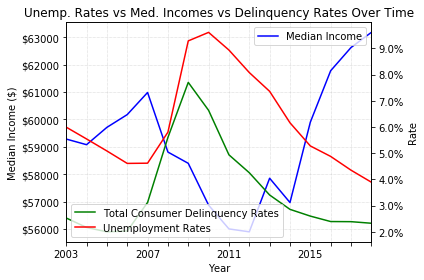

In [31]:
# CREATE CHART!!!
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots()

# Set the x axis
x_axis = combined_df['Date']

# Set the plot title and axes titles
plt.title("Unemp. Rates vs Med. Incomes vs Delinquency Rates Over Time")
plt.xlabel("Year")
plt.ylabel("Median Income ($)")

# Plot the 'mean' list vs. the established x axis with error
ax1.plot(x_axis, combined_df['Median_Income'], color="blue", label="Median Income")


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(x_axis, combined_df['Consumer_Delinquency_Rates'], color="green", label="Total Consumer Delinquency Rates")
ax2.plot(x_axis, combined_df['Unemployment_Rates'], color="red", label="Unemployment Rates")

ax2.set_ylabel('Rate', color="black")

# Add the legend and gridlines
ax1.legend(loc=1)
ax2.legend(loc=3)

tick_locations = [value for value in x_axis]
ax1.set_xticks(tick_locations, minor=False)
for i, t in enumerate(ax1.get_xticklabels()):
    if (i % 4) != 0:
        t.set_visible(False)
ax1.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(min(x_axis), max(x_axis))

ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('$%1.0f'))
# ${:,.0f}
# $%1.0f
fig.tight_layout()  # otherwise the right y-label is slightly clipped
# save the figure
plt.savefig("Figures/Combined_Data.png")

# Show the resulting scatter plot
plt.show()